# Importing required libraries

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

import pandas as pd
import numpy as np


# Initializing Feature and Response matrices stored as .CSV files earlier

## Training Dataset

In [2]:
X_train = np.loadtxt(r'R:\Ryerson\Misc\Datasets\Preprocessed Data Files\30_Day_Window_Scaled\X_train_30_day_window_scaled.csv', delimiter=',')

y_target_train = np.loadtxt(r'R:\Ryerson\Misc\Datasets\Preprocessed Data Files\30_Day_Window_Scaled\y_target_train_30_day_window_scaled.csv', delimiter=',')


In [3]:
X_train.shape

y_target_train.shape


(639476, 18)

(639476,)

## Validation Dataset

In [8]:
X_valid = np.loadtxt(r'R:\Ryerson\Misc\Datasets\Preprocessed Data Files\30_Day_Window_Scaled\X_valid_30_day_window_scaled.csv', delimiter=',')

y_target_valid = np.loadtxt(r'R:\Ryerson\Misc\Datasets\Preprocessed Data Files\30_Day_Window_Scaled\y_target_valid_30_day_window_scaled.csv', delimiter=',')


In [9]:
X_valid.shape

y_target_valid.shape


(71721, 18)

(71721,)

## Testing Dataset

In [10]:
X_test = np.loadtxt(r'R:\Ryerson\Misc\Datasets\Preprocessed Data Files\30_Day_Window_Scaled\X_test_30_day_window_scaled.csv', delimiter=',')

y_target_test = np.loadtxt(r'R:\Ryerson\Misc\Datasets\Preprocessed Data Files\30_Day_Window_Scaled\y_target_test_30_day_window_scaled.csv', delimiter=',')


In [11]:
X_test.shape

y_target_test.shape


(71841, 18)

(71841,)

In [ ]:
#y_target_train = y_target_train.ravel()
#y_target_train.shape

# Training KNN models by selecting arbitrary values for number of neighbors

## _k = 1_

In [6]:
knn = KNeighborsRegressor(n_neighbors=1)

In [7]:
knn.fit(X_train, y_target_train)

KNeighborsRegressor(n_neighbors=1)

In [12]:
#determining R^2 score for k=1
knn.score(X_valid, y_target_valid)

-0.8147156606353831

## _k = 5_

In [13]:
knn_5 = KNeighborsRegressor(n_neighbors=5)

In [16]:
knn_5.fit(X_train, y_target_train)

KNeighborsRegressor()

In [17]:
#determining R^2 score for k=5
knn_5.score(X_valid, y_target_valid)

-0.04128073801736787

# Determining the optimal hyperparameters and using the same for predictions

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

#plt.style.use('seaborn-poster')


## Plotting a complexity curve to determine the optimal value for k

In [23]:
trainScores = []
testScores = []
    
def plotComplexityCurve(kSizeList, knnModel, X_train, X_test, y_train, y_test):
    
    # Training KNN for each k and storing scores
    for k in kSizeList:
        # Initialize, fit, predict
        knn = knnModel(n_neighbors=k)
        
        knn.fit(X_train, y_train)
        
        trainScores.append(knn.score(X_train, y_train))
        testScores.append(knn.score(X_test, y_test))

    # Plotting
    fig, ax = plt.subplots()
    
    ax.plot(kSizeList, trainScores, label='Training Accuracy', color='red')
    ax.plot(kSizeList, testScores, label='Testing Accuracy', color='black')

    ax.set(title='Plot of Accuracy Scores for KNN with Different Values for $k$',
           xlabel='Number of Neighbors',
           ylabel='Accuracy')
    
    ax.legend()


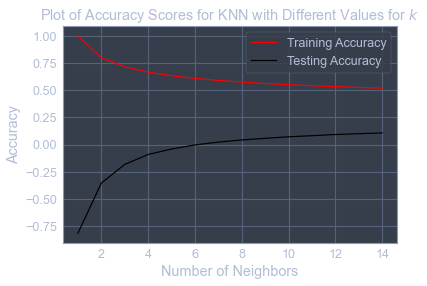

In [25]:
# Choosing values for k
numNeighbors = np.arange(1, 15)

# Calling plot function defined above
plotComplexityCurve(numNeighbors, KNeighborsRegressor, X_train, X_valid, y_target_train, y_target_valid)


## Examining the plot above, it can be inferred that _k = 14_ has the best R^2 score. Therefore, predicting drought scores for test data using a higher _k_ value:

In [33]:
from sklearn import metrics

#initialize, fit, and predict
knn = KNeighborsRegressor(n_neighbors=15, n_jobs=-1)
        
knn.fit(X_train, y_target_train)

yPredicted = knn.predict(X_test)

# print 
metricMAE = metrics.mean_absolute_error(y_target_test, yPredicted)
metricMSE = metrics.mean_squared_error(y_target_test, yPredicted)
metricRMSE = np.sqrt(metrics.mean_squared_error(y_target_test, yPredicted))
metricR2 = metrics.r2_score(y_target_test, yPredicted)

KNeighborsRegressor(n_jobs=-1, n_neighbors=15)

In [34]:
print('\nMAE: ', metricMAE, '\n\nMSE: ', metricMSE, '\n\nRMSE: ', metricRMSE, '\n\nR^2 Score: ', metricR2)


MAE:  0.5609638819986729 

MSE:  0.6689706309726144 

RMSE:  0.8179062482782574 

R^2 Score:  0.048906134798811673
